# 

# 

# HR Analytics Project- Understanding the Attrition in HR

### Project Objective:

The main goal of this project is to predict employee attrition in advance. Attrition refers to employees leaving the company voluntarily or involuntarily. By using HR Analytics, we aim to create predictive models that identify factors contributing to attrition, helping companies take proactive steps to retain talent, reduce turnover costs, and optimize workforce management for improved organizational performance.

# 

# 

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Importing Data from Website

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# 

# 

### EDA

#### Checking shape

In [3]:
df.shape

(1470, 35)

#### Checking Duplicate values

In [4]:
df.duplicated().sum()

0

#### Analyzing Columns

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print('\n')

Column: Age
Unique Values: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


Column: Attrition
Unique Values: ['Yes' 'No']


Column: BusinessTravel
Unique Values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


Column: DailyRate
Unique Values: [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 13

#### Dropping columns that have only Single values or Irrelevent data

In [7]:
df.drop(['Over18','EmployeeNumber','StandardHours','EmployeeCount'], axis=1,inplace=True)

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


#### Checking Datatypes of Columns

In [9]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

#### Checking Null values

In [10]:
df.isnull().sum().sum()

0

# 

# 

### Encoding

In [11]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [12]:
df['Attrition']=df['Attrition'].replace('Yes', 1)
df['Attrition']=df['Attrition'].replace('No', 0)

In [13]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
object_columns = df.select_dtypes(include=['object'])
for column in object_columns:
    df[column] = le.fit_transform(df[column])

In [16]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [17]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print('\n')

Column: Age
Unique Values: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


Column: Attrition
Unique Values: [1 0]


Column: BusinessTravel
Unique Values: [2 1 0]


Column: DailyRate
Unique Values: [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1

# 

# 

### Removing Outliners

In [18]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,1.097279,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

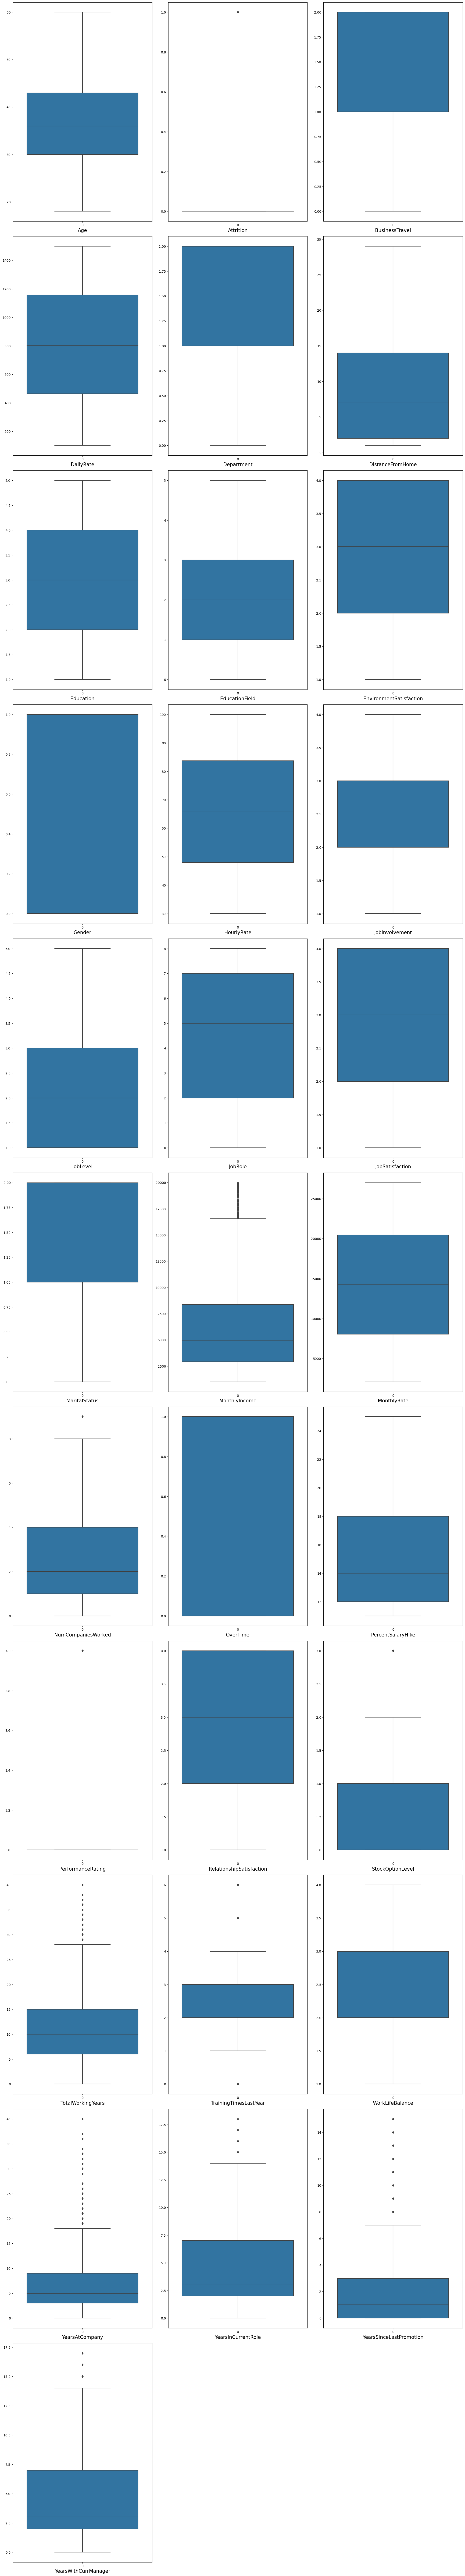

In [20]:
plt.figure(figsize=(20, 120))
graph = 1

for column in df.columns:
    if graph <= 32:
        plt.subplot(12, 3, graph)
        sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=15)
    graph += 1

plt.tight_layout()
plt.show()

In [21]:
from scipy.stats import zscore 

z_score = zscore (df[['MonthlyIncome','TotalWorkingYears','YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 2.7).all(axis=1)
df = df[filtering_entry]

df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,35.979851,0.167910,1.601493,806.761940,1.261194,9.247761,2.886567,2.250746,2.725373,0.601493,65.704478,2.737313,1.881343,4.525373,2.736567,1.107463,5709.566418,14239.962687,2.659701,0.285821,15.219403,3.152239,2.698507,0.796269,9.844776,2.814179,2.761194,5.836567,3.791791,1.647761,3.687313
std,8.787188,0.373926,0.668951,401.479351,0.527498,8.098615,1.024990,1.335937,1.087280,0.489774,20.342823,0.706068,0.928406,2.490930,1.099938,0.729474,3843.840983,7055.171443,2.491333,0.451973,3.614498,0.359386,1.078750,0.857851,6.276056,1.293613,0.708205,4.283390,3.169462,2.292590,3.173121
min,18.000000,0.000000,0.000000,103.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2097.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,469.750000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2809.750000,8051.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,35.000000,0.000000,2.000000,806.500000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,66.000000,3.000000,2.000000,6.000000,3.000000,1.000000,4624.000000,14056.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,41.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,83.000000,3.000000,2.000000,7.000000,4.000000,2.000000,6817.500000,20372.500000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,12.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1.000000,2.000000,1498.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19197.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,32.000000,6.000000,4.000000,22.000000,14.000000,10.000000,13.000000


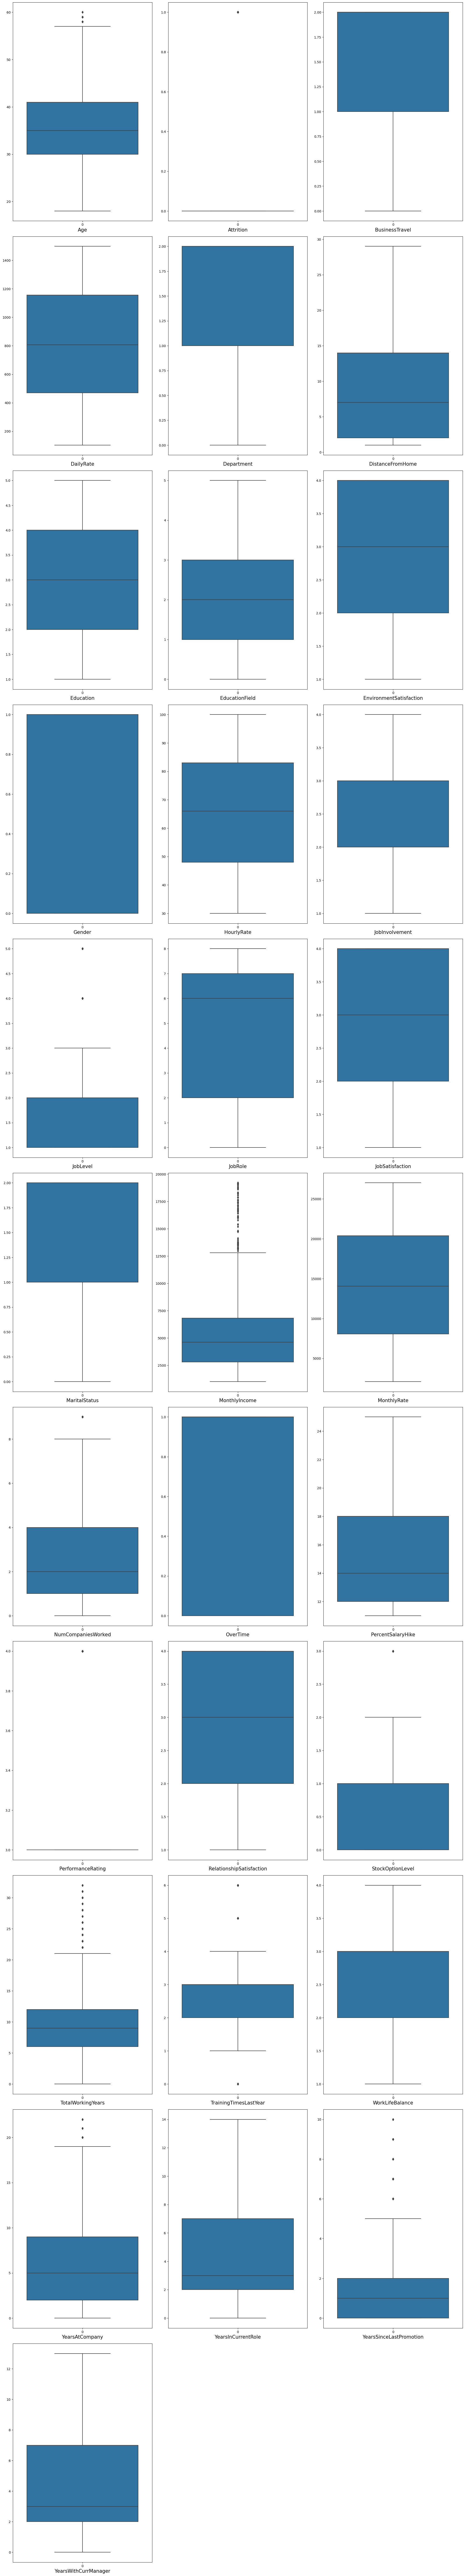

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 120))
graph = 1

for column in df.columns:
    if graph <= 32:
        plt.subplot(12, 3, graph)
        sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=15)
    graph += 1

plt.tight_layout()
plt.show()

In [23]:
df.shape

(1340, 31)

# 

# 

### Removing Skewness

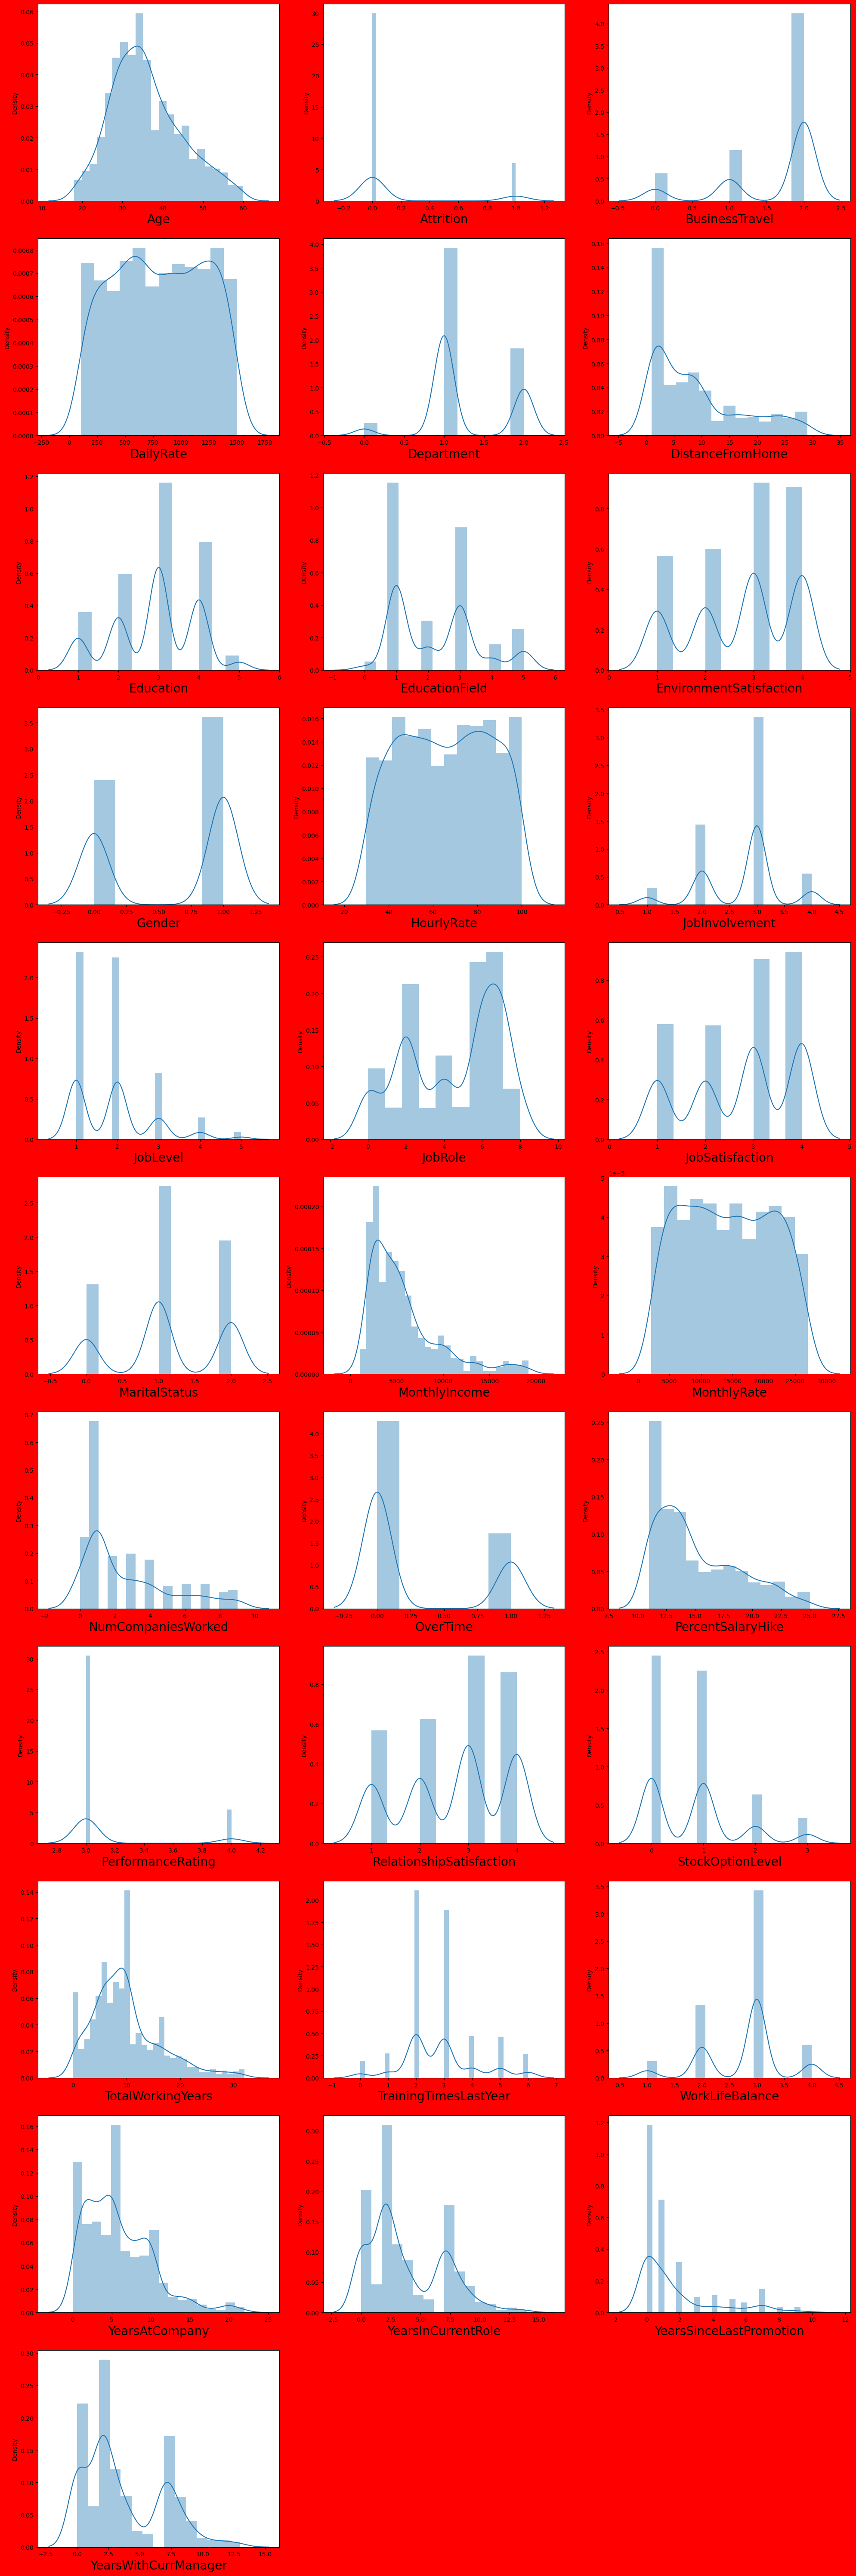

In [24]:
plt.figure(figsize=(20,60), facecolor='red')
plotnumber = 1

for column in df:                       
    if plotnumber<=32:                    
        ax = plt.subplot(11,3,plotnumber)    
        sns.distplot(df[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

In [26]:
df.skew()

Age                         0.513247
Attrition                   1.778885
BusinessTravel             -1.416274
DailyRate                  -0.018935
Department                  0.174139
DistanceFromHome           -0.047915
Education                  -0.275967
EducationField              0.549350
EnvironmentSatisfaction    -0.322424
Gender                     -0.415066
HourlyRate                 -0.024384
JobInvolvement             -0.496479
JobLevel                    1.061847
JobRole                    -0.399385
JobSatisfaction            -0.338465
MaritalStatus              -0.168350
MonthlyIncome               0.293528
MonthlyRate                 0.044085
NumCompaniesWorked          0.110956
OverTime                    0.949168
PercentSalaryHike           0.476348
PerformanceRating           1.938198
RelationshipSatisfaction   -0.287133
StockOptionLevel            0.957990
TotalWorkingYears          -0.769617
TrainingTimesLastYear       0.580698
WorkLifeBalance            -0.544563
Y

In [25]:
df['DistanceFromHome'] = np.log1p(df['DistanceFromHome'])
df['MonthlyIncome'] = np.log(df['MonthlyIncome'])
df['NumCompaniesWorked'] = np.log1p(df['NumCompaniesWorked'])
df['PercentSalaryHike'] = np.log(df['PercentSalaryHike'])
df['TotalWorkingYears'] = np.log1p(df['TotalWorkingYears'])
df['YearsAtCompany'] = np.log1p(df['YearsAtCompany'])
df['YearsInCurrentRole'] = np.log1p(df['YearsInCurrentRole'])
df['YearsSinceLastPromotion'] = np.log1p(df['YearsSinceLastPromotion'])
df['YearsWithCurrManager'] = np.log1p(df['YearsWithCurrManager'])

In [26]:
df.skew()

Age                         0.513247
Attrition                   1.778885
BusinessTravel             -1.416274
DailyRate                  -0.018935
Department                  0.174139
DistanceFromHome           -0.047915
Education                  -0.275967
EducationField              0.549350
EnvironmentSatisfaction    -0.322424
Gender                     -0.415066
HourlyRate                 -0.024384
JobInvolvement             -0.496479
JobLevel                    1.061847
JobRole                    -0.399385
JobSatisfaction            -0.338465
MaritalStatus              -0.168350
MonthlyIncome               0.293528
MonthlyRate                 0.044085
NumCompaniesWorked          0.110956
OverTime                    0.949168
PercentSalaryHike           0.476348
PerformanceRating           1.938198
RelationshipSatisfaction   -0.287133
StockOptionLevel            0.957990
TotalWorkingYears          -0.769617
TrainingTimesLastYear       0.580698
WorkLifeBalance            -0.544563
Y

In [27]:
df.shape

(1340, 31)

# 

# 

### Choosing only Best Features

In [28]:
from sklearn.feature_selection import SelectKBest, f_classif

In [29]:
x = df.drop(columns = ['Attrition'])
y = df['Attrition']

In [30]:
best_features = SelectKBest(score_func=f_classif, k=14)

fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_) 
df_columns = pd.DataFrame(x.columns) 

feature_scores = pd.concat([df_columns, df_scores], axis=1)

feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(14, 'Score'))

               Feature_Name      Score
18                 OverTime  96.487464
23        TotalWorkingYears  79.944704
26           YearsAtCompany  64.294277
15            MonthlyIncome  56.777530
29     YearsWithCurrManager  53.726591
27       YearsInCurrentRole  51.898318
11                 JobLevel  43.301518
14            MaritalStatus  36.882337
0                       Age  34.087861
22         StockOptionLevel  27.690883
10           JobInvolvement  25.018742
13          JobSatisfaction  17.586316
7   EnvironmentSatisfaction  16.017053
4          DistanceFromHome  10.340176


In [31]:
df=df[['Attrition', 'OverTime', 'TotalWorkingYears', 'YearsAtCompany', 'MonthlyIncome', 'YearsWithCurrManager', 'YearsInCurrentRole', 'MaritalStatus', 'JobLevel', 'Age', 'StockOptionLevel', 'JobInvolvement', 'JobSatisfaction', 'EnvironmentSatisfaction', 'DistanceFromHome']]
df.head()

,Attrition,OverTime,TotalWorkingYears,YearsAtCompany,MonthlyIncome,YearsWithCurrManager,YearsInCurrentRole,MaritalStatus,JobLevel,Age,StockOptionLevel,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome
0,1,1,2.197225,1.945910,8.698347,1.791759,1.609438,2,2,41,0,3,4,2,0.693147
1,0,0,2.397895,2.397895,8.542861,2.079442,2.079442,1,2,49,1,2,2,3,2.197225
2,1,1,2.079442,0.000000,7.644919,0.000000,0.000000,2,1,37,0,2,3,4,1.098612
3,0,1,2.197225,2.197225,7.975565,0.000000,2.079442,1,1,33,0,3,3,4,1.386294
4,0,0,1.945910,1.098612,8.151333,1.098612,1.098612,1,1,27,1,3,2,1,1.098612


In [32]:
df.shape

(1340, 15)

# 

# 

### Removing Multicolinearity

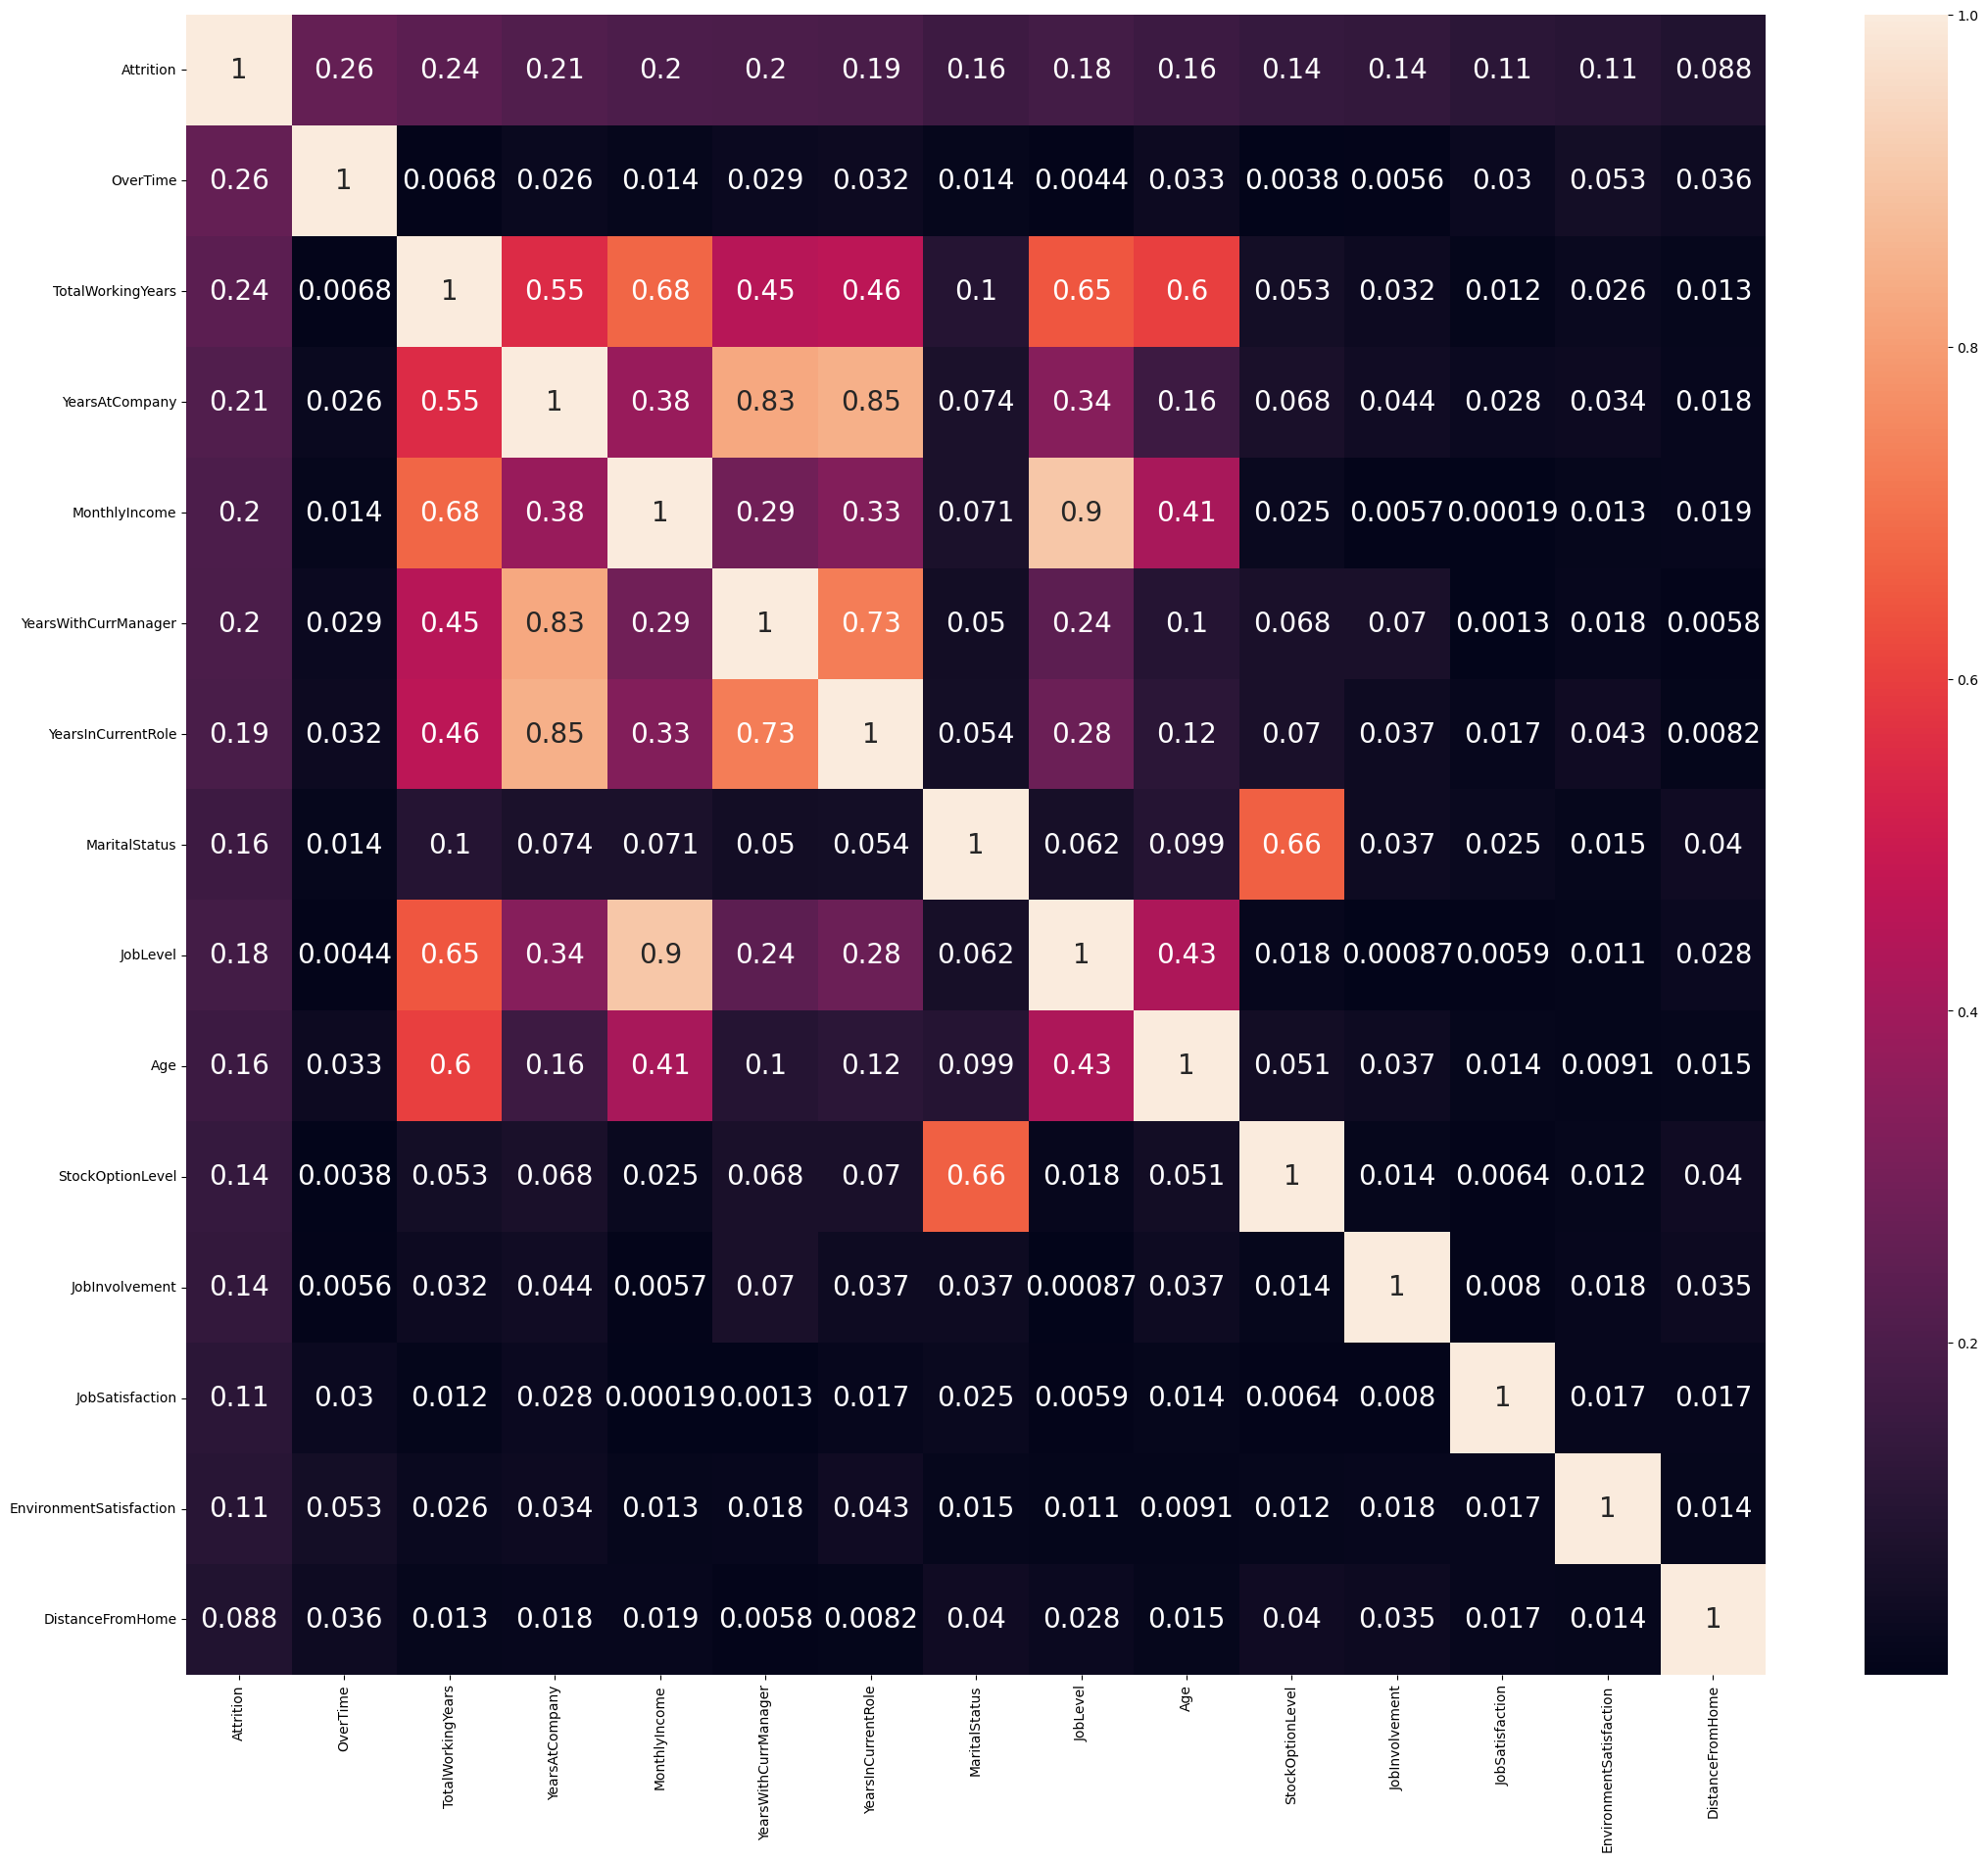

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.corr().abs ()

plt.figure(figsize=(26, 22))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :20})
plt.show()

In [34]:
df.columns

Index(['Attrition', 'OverTime', 'TotalWorkingYears', 'YearsAtCompany',
       'MonthlyIncome', 'YearsWithCurrManager', 'YearsInCurrentRole',
       'MaritalStatus', 'JobLevel', 'Age', 'StockOptionLevel',
       'JobInvolvement', 'JobSatisfaction', 'EnvironmentSatisfaction',
       'DistanceFromHome'],
      dtype='object')

In [35]:
df.drop(['Age','JobLevel','StockOptionLevel','YearsInCurrentRole','YearsAtCompany','MonthlyIncome'], axis=1,inplace=True)

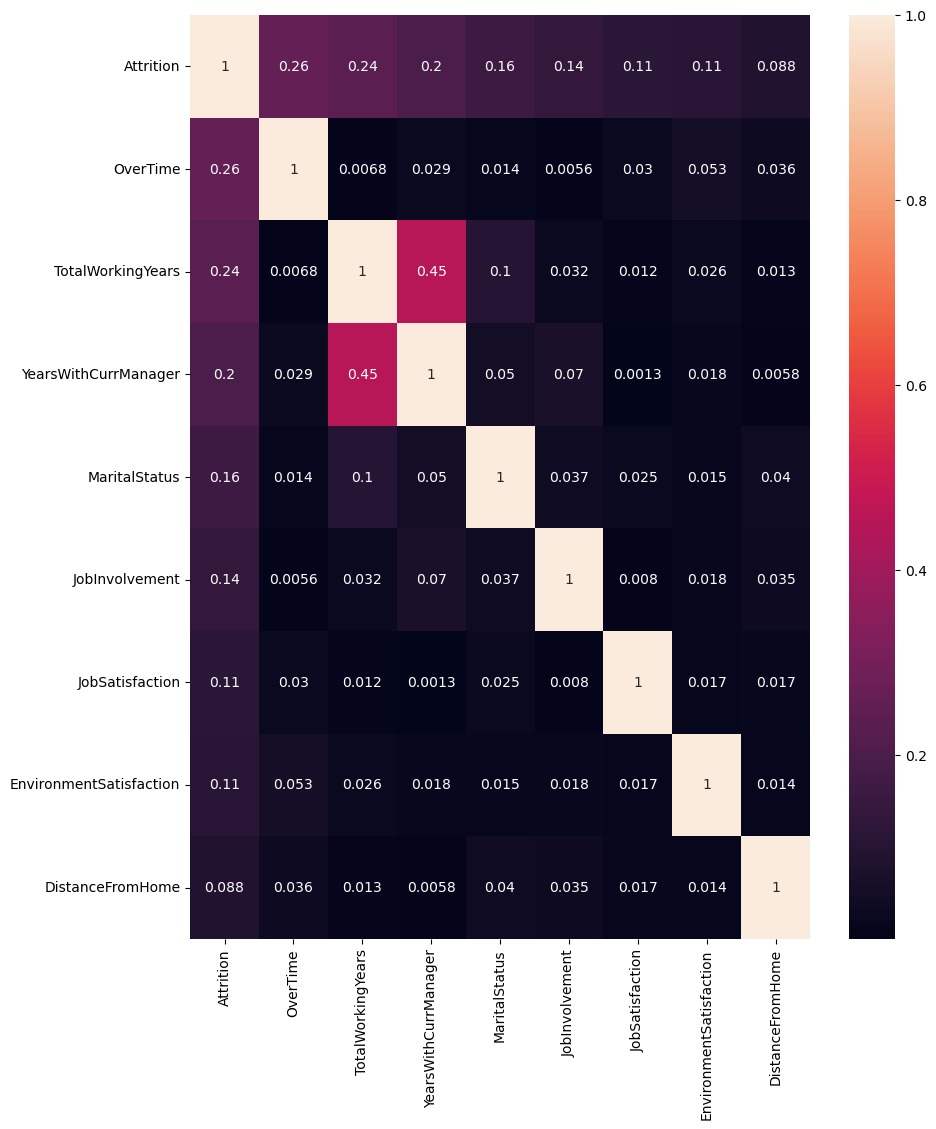

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.corr().abs ()

plt.figure(figsize=(10, 12))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

# 

# 

### Oversampling

In [37]:
value_counts = df['Attrition'].value_counts()
print(value_counts)

0    1115
1     225
Name: Attrition, dtype: int64


In [38]:
x = df.drop(['Attrition'],axis=1)
y = df['Attrition']

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
upsample = SMOTE()

In [41]:
x, y = upsample.fit_resample(x,y)

In [42]:
from collections import Counter
count = Counter(y)
print(count)

Counter({1: 1115, 0: 1115})


# 

# 

### Standardization

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 

# 

### Train-Test split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=12)

# 

# 

### Importing important Metrices

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

# 

# 

### BaggingClassifier with DecisionTreeClassifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
from sklearn.ensemble import BaggingClassifier

In [50]:
bag_ds = BaggingClassifier(DecisionTreeClassifier(criterion='gini',min_samples_split=3,max_depth=16))

In [51]:
bag_ds.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=16,
                                                        min_samples_split=3))

In [52]:
print('Accuracy Score:',bag_ds.score(x_train, y_train))

Accuracy Score: 0.993421052631579


In [53]:
y_pred = bag_ds.predict(x_test)

In [54]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8655913978494624


In [55]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[244,  43],
       [ 32, 239]], dtype=int64)

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       287
           1       0.85      0.88      0.86       271

    accuracy                           0.87       558
   macro avg       0.87      0.87      0.87       558
weighted avg       0.87      0.87      0.87       558



In [57]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.8660465176080332

# 

### Cross-validation on BaggingClassifier with DecisionTreeClassifier

In [58]:
from sklearn.model_selection import KFold, cross_val_score

In [59]:
c1=cross_val_score(bag_ds, x_train, y_train, cv=5)
c1

array([0.84179104, 0.86268657, 0.87125749, 0.80838323, 0.87125749])

In [60]:
c1.mean()

0.8510751631066228

In [61]:
c2=cross_val_score(bag_ds, x_test, y_test, cv=5)
c2

array([0.76785714, 0.8125    , 0.83928571, 0.74774775, 0.73873874])

In [62]:
c2.mean()

0.7812258687258687

In [63]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.8660465176080332

# 

### BaggingClassifier with RandomForestClassifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
from sklearn.ensemble import BaggingClassifier

In [66]:
bag_rf = BaggingClassifier(RandomForestClassifier(n_estimators=450,criterion='gini',min_samples_split=3,max_depth=16))

In [67]:
bag_rf.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=16,
                                                        min_samples_split=3,
                                                        n_estimators=450))

In [68]:
print('Accuracy Score:',bag_rf.score(x_train, y_train))

Accuracy Score: 0.9778708133971292


In [69]:
y_pred = bag_rf.predict(x_test)

In [70]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8727598566308243


In [71]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[251,  36],
       [ 35, 236]], dtype=int64)

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       287
           1       0.87      0.87      0.87       271

    accuracy                           0.87       558
   macro avg       0.87      0.87      0.87       558
weighted avg       0.87      0.87      0.87       558



In [73]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.8727065842086993

# 

### Cross-validation on BaggingClassifier with RandomForestClassifier

In [74]:
from sklearn.model_selection import KFold, cross_val_score

In [75]:
c3=cross_val_score (bag_rf, x_train, y_train, cv=5)
c3

array([0.86865672, 0.87164179, 0.88922156, 0.86227545, 0.89221557])

In [76]:
c3.mean()

0.8768022164625972

In [77]:
c4=cross_val_score (bag_rf, x_test, y_test, cv=5)
c4

array([0.75      , 0.83928571, 0.80357143, 0.76576577, 0.76576577])

In [78]:
c4.mean()

0.7848777348777348

In [79]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.8727065842086993

# 

### BaggingClassifier with KNeighborsClassifier

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
from sklearn.ensemble import BaggingClassifier

In [82]:
bag_kn = BaggingClassifier(KNeighborsClassifier(n_neighbors=3, leaf_size=25, p = 1, algorithm='auto', weights = 'distance'))

In [83]:
bag_kn.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(leaf_size=25,
                                                      n_neighbors=3, p=1,
                                                      weights='distance'))

In [84]:
print('Accuracy Score:',bag_kn.score(x_train, y_train))

Accuracy Score: 0.9922248803827751


In [85]:
y_pred = bag_kn.predict(x_test)

In [86]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8333333333333334


In [87]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[216,  71],
       [ 22, 249]], dtype=int64)

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       287
           1       0.78      0.92      0.84       271

    accuracy                           0.83       558
   macro avg       0.84      0.84      0.83       558
weighted avg       0.84      0.83      0.83       558



In [89]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.8357162143050002

# 

### Cross-validation on BaggingClassifier with KNeighbors Classifier

In [90]:
from sklearn.model_selection import KFold, cross_val_score

In [91]:
c5=cross_val_score (bag_kn, x_train, y_train, cv=5)
c5

array([0.81791045, 0.8238806 , 0.82634731, 0.80538922, 0.8502994 ])

In [92]:
c5.mean()

0.8247653945839664

In [93]:
c6=cross_val_score (bag_kn, x_test, y_test, cv=5)
c6

array([0.77678571, 0.77678571, 0.75892857, 0.79279279, 0.75675676])

In [94]:
c6.mean()

0.77240990990991

In [95]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.8357162143050002

# 

### GradientBoostingClassifier

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
cls_gb = GradientBoostingClassifier(n_estimators=50,learning_rate=1,max_depth=3)

In [98]:
cls_gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=50)

In [99]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 0.9659090909090909


In [100]:
y_pred = cls_gb.predict(x_test)

In [101]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8691756272401434


In [102]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[251,  36],
       [ 37, 234]], dtype=int64)

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       287
           1       0.87      0.86      0.87       271

    accuracy                           0.87       558
   macro avg       0.87      0.87      0.87       558
weighted avg       0.87      0.87      0.87       558



In [104]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.8690165473083302

# 

### Cross-validation with GradientBoostingClassifier

In [105]:
from sklearn.model_selection import KFold, cross_val_score

In [106]:
c7=cross_val_score (cls_gb, x_train, y_train, cv=5)
c7

array([0.84776119, 0.89253731, 0.88323353, 0.8742515 , 0.88023952])

In [107]:
c7.mean()

0.8756046116721781

In [108]:
c8=cross_val_score (cls_gb, x_test, y_test, cv=5)
c8

array([0.8125    , 0.8125    , 0.82142857, 0.85585586, 0.8018018 ])

In [109]:
c8.mean()

0.8208172458172458

In [110]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.8690165473083302

# 

### BaggingClassifier with GradientBoostingClassifier

In [111]:
from sklearn.ensemble import BaggingClassifier

In [112]:
bag_gb = BaggingClassifier(GradientBoostingClassifier(n_estimators=50,learning_rate=1,max_depth=3))

In [113]:
bag_gb.fit(x_train, y_train)

BaggingClassifier(base_estimator=GradientBoostingClassifier(learning_rate=1,
                                                            n_estimators=50))

In [114]:
print('Accuracy Score:',bag_gb.score(x_train, y_train))

Accuracy Score: 0.9700956937799043


In [115]:
y_pred = bag_gb.predict(x_test)

In [116]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8942652329749103


In [117]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[261,  26],
       [ 33, 238]], dtype=int64)

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       287
           1       0.90      0.88      0.89       271

    accuracy                           0.89       558
   macro avg       0.89      0.89      0.89       558
weighted avg       0.89      0.89      0.89       558



In [119]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.8938182238965247

# 

### Cross-validation on BaggingClassifier with GradientBoostingClassifier

In [120]:
from sklearn.model_selection import KFold, cross_val_score

In [121]:
c9=cross_val_score(bag_gb, x_train, y_train, cv=5)
c9

array([0.87462687, 0.89253731, 0.89221557, 0.89520958, 0.89820359])

In [122]:
c9.mean()

0.8905585843238896

In [123]:
c10=cross_val_score(bag_gb, x_test, y_test, cv=5)
c10

array([0.82142857, 0.84821429, 0.83928571, 0.81081081, 0.82882883])

In [124]:
c10.mean()

0.8297136422136422

In [125]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.8938182238965247

# 

# 

### Plotting ROC Curve for all models

In [126]:
from sklearn.metrics import plot_roc_curve

#### On Training Data

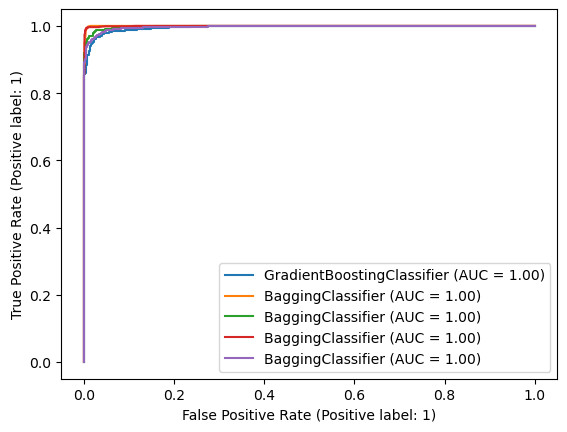

In [127]:
disp = plot_roc_curve (cls_gb, x_train, y_train)

plot_roc_curve (bag_ds, x_train, y_train, ax=disp.ax_)
plot_roc_curve (bag_rf, x_train, y_train, ax=disp.ax_)
plot_roc_curve (bag_kn, x_train, y_train, ax=disp.ax_)
plot_roc_curve (bag_gb, x_train, y_train, ax=disp.ax_)

plt.legend (prop={'size' :10}, loc= 'lower right')
                  
plt.show()

#### On Testing Data

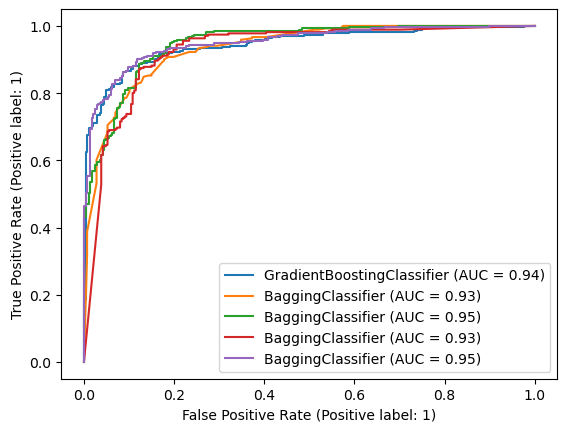

In [1131]:
disp = plot_roc_curve (cls_gb, x_test, y_test)

plot_roc_curve (bag_ds, x_test, y_test, ax=disp.ax_)
plot_roc_curve (bag_rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve (bag_kn, x_test, y_test, ax=disp.ax_)
plot_roc_curve (bag_gb, x_test, y_test, ax=disp.ax_)

plt.legend (prop={'size' :10}, loc= 'lower right')
                  
plt.show()

# 

# 

### Saving the Best Model

In [128]:
import pickle 

In [129]:
with open('bag_rf', 'wb') as f: 
    pickle.dump(bag_rf, f)

In [130]:
with open('bag_gb', 'wb') as f: 
    pickle.dump(bag_gb, f)

# 

# 